The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If on an employee if you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else.

This project is based on a hypothetical dataset downloaded from IBM HR Analytics Employee Attrition & Performance. 
It has 1,470 data points (rows) and 35 features (columns) describing each employee’s background and characteristics; and labelled (supervised learning) with whether they are still in the company or whether they have gone to work somewhere else. 

<b>Problem statement</b> To understand and determine how these factors relate to workforce attrition.

Dataset: https://www.kaggle.com/patelprashant/employee-attrition

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing  the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.shape

(1470, 35)

In [3]:
df.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  

[3 rows x 35 columns]

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [5]:
df.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0

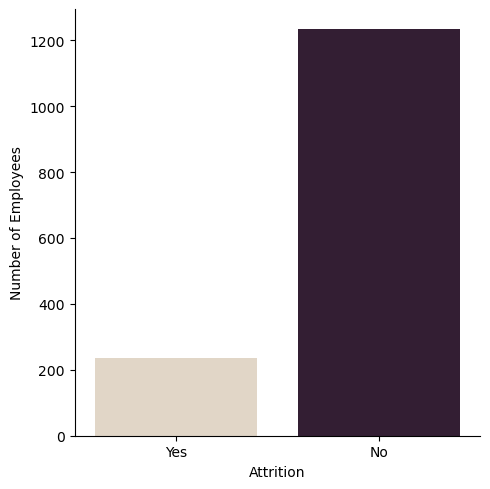

In [6]:
# Checking the number of 'Yes' and 'No' in 'Attrition'
ax = sns.catplot(x="Attrition", kind="count", palette="ch:.25", data=df)
ax.set(xlabel='Attrition', ylabel='Number of Employees')
plt.show()

any missing values in the dataframe. 

In [7]:
#Identifying columns with missing information
missing_col = df.columns[df.isnull().any()].values
print('The missing columns in the dataset are: ',missing_col)

The missing columns in the dataset are:  []


In [9]:
df.isnull().sum().sort_values(ascending=False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

## Step 2 - Feature Engineering

The numeric and categorical fields need to be treated separately and the target field needs to be separated from the training dataset. The following few steps separate the numeric and categorical fields and drops the target field 'Attrition' from the feature set.

In [10]:
#Extracting the Numeric and Categorical features
df_num = pd.DataFrame(data = df.select_dtypes(include = ['int64']))
df_cat = pd.DataFrame(data = df.select_dtypes(include = ['object']))
print("Shape of Numeric: ",df_num.shape)
print("Shape of Categorical: ",df_cat.shape)

Shape of Numeric:  (1470, 26)
Shape of Categorical:  (1470, 9)


### 2.1 Encoding Categorical Fields

The categorical fields have been encoded using the get_dummies() function of Pandas.

In [11]:
#Dropping 'Attrition' from df_cat before encoding
df_cat = df_cat.drop(['Attrition'], axis=1) 

#Encoding using Pandas' get_dummies
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head(5)

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 0   
3                          0                                 1   
4                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             0                           0   
2                             1                           0   
3                             0                           0   
4                             1                           0   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     1   
3                         0                       0                     0   
4                         0                       1                     0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              1            0   
1                                0              0            1   
2                                0              0            1   
3                                0              1            0   
4                                0              0            1   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   
2                                  0                        0   
3                                  0                        0   
4                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                      

### 2.2 Scaling Numeric Fields

The numeric fields have been scaled next for best results. StandardScaler() has been used for the same. Post scaling of the numeric features, they are merged with the categorical ones.

In [12]:
# Using StandardScaler to scale the numeric features
standard_scaler = StandardScaler()
df_num_scaled = standard_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(
    data=df_num_scaled, columns=df_num.columns, index=df_num.index)
print("Shape of Numeric After Scaling: ", df_num_scaled.shape)
print("Shape of categorical after Encoding: ", df_cat_encoded.shape)

Shape of Numeric After Scaling:  (1470, 26)
Shape of categorical after Encoding:  (1470, 29)


In [13]:
#Combining the Categorical and Numeric features
df_transformed_final = pd.concat([df_num_scaled,df_cat_encoded], axis = 1)
print("Shape of final dataframe: ",df_transformed_final.shape)

Shape of final dataframe:  (1470, 55)


In [14]:
df_transformed_final.head(3)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.446350   0.742527         -1.010909  -0.891688            0.0   
1  1.322365  -1.297775         -0.147150  -1.868426            0.0   
2  0.008343   1.414363         -0.887515  -0.891688            0.0   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0       -1.701283                -0.660531    1.383138        0.379672   
1       -1.699621                 0.254625   -0.240677       -1.026167   
2       -1.696298                 1.169781    1.284725       -1.026167   

   JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0 -0.057788         1.153254      -0.108350     0.726020            2.125136   
1 -0.057788        -0.660853      -0.291719     1.488876           -0.678049   
2 -0.961486         0.246200      -0.937654    -1.674841            1.324226   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0          -1.150554          -0.426230                 -1.584178   
1           2.129306           2.346151                  1.191438   
2          -0.057267          -0.426230                 -0.658973   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            0.0         -0.932014          -0.421642              -2.171982   
1            0.0          0.241988          -0.164511               0.155707   
2            0.0         -0.932014          -0.550208               0.155707   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0        -2.493820       -0.164613           -0.063296   
1         0.338096        0.488508            0.764998   
2         0.338096       -1.144294           -1.167687   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                -0.679146              0.245834                          0   
1                -0.368715              0.806541                          0   
2                -0.679146             -1.155935                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   
2                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              1            0   
1                                0              0            1   
2                                0              0            1   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   
2                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   

 

In [15]:
df_transformed_final.shape

(1470, 55)

In [ ]:
df['Attrition'].value_counts()

In [16]:
#Extracting the target variable - 'Attrition'
target = df['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

#Copying into commonly used fields for simplicity
X = df_transformed_final #Features
y = target #Target

Shape of target:  (1470,)


In [17]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### 2.3 Train and Test Split

The data is next split into training and test dataset using the train_test_split functionality of sklearn.

In [18]:
# Splitting into Train and Test dataset in 90-10 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0, stratify=y)
print("Shape of X Train: ", X_train.shape)
print("Shape of X Test: ", X_test.shape)
print("Shape of y Train: ", y_train.shape)
print("Shape of y Test: ", y_test.shape)

Shape of X Train:  (1176, 55)
Shape of X Test:  (294, 55)
Shape of y Train:  (1176,)
Shape of y Test:  (294,)


## Step 3 - Model Fitting



In [19]:
# Using Gradient Boosting to predict 'Attrition' and 
# create the Trees to identify important features
gbm = GradientBoostingClassifier(
    n_estimators=200, max_features=0.7, learning_rate=0.3, 
    max_depth=5, random_state=0, verbose=0)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# Fitting Model
gbm.fit(X_train, y_train)

# pred
y_pred = gbm.predict(X_test)

In [20]:
print('Accuracy of the model is:  ',accuracy_score(y_test, y_pred))

Accuracy of the model is:   0.8503401360544217


In [21]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[240   7]
 [ 37  10]]


## Step 4 - Visualisation and Identification of Important Features

Here, I have used the 'feature_importances_' array of the Gradient Boosting Model to ascertain the most important features for the prediction of 'Attrition'.


In [22]:
# Scatter plot 
trace = go.Scatter(
    y = gbm.feature_importances_,
    x = df_transformed_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 12,
        color = gbm.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_transformed_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

## Step 3 - Model Fitting



In [23]:
from catboost import CatBoostClassifier


In [24]:
# Using Gradient Boosting to predict 'Attrition' and 
# create the Trees to identify important features
cbc = CatBoostClassifier()
# https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier
# Fitting Model
cbc.fit(X_train, y_train)

# pred
y_pred = cbc.predict(X_test)

Learning rate set to 0.011041
0:	learn: 0.6847737	total: 60.5ms	remaining: 1m
1:	learn: 0.6763219	total: 63.6ms	remaining: 31.7s
2:	learn: 0.6679588	total: 66.2ms	remaining: 22s
3:	learn: 0.6608627	total: 68.6ms	remaining: 17.1s
4:	learn: 0.6538133	total: 71ms	remaining: 14.1s
5:	learn: 0.6464623	total: 73.6ms	remaining: 12.2s
6:	learn: 0.6385003	total: 76.3ms	remaining: 10.8s
7:	learn: 0.6324111	total: 79.6ms	remaining: 9.87s
8:	learn: 0.6260100	total: 81.9ms	remaining: 9.02s
9:	learn: 0.6190784	total: 84.6ms	remaining: 8.38s
10:	learn: 0.6130648	total: 86ms	remaining: 7.74s
11:	learn: 0.6062536	total: 87.6ms	remaining: 7.21s
12:	learn: 0.5995963	total: 89.1ms	remaining: 6.76s
13:	learn: 0.5933994	total: 90.6ms	remaining: 6.38s
14:	learn: 0.5871361	total: 92ms	remaining: 6.04s
15:	learn: 0.5818349	total: 94.2ms	remaining: 5.79s
16:	learn: 0.5766782	total: 95.6ms	remaining: 5.53s
17:	learn: 0.5723595	total: 97.1ms	remaining: 5.3s
18:	learn: 0.5672736	total: 98.4ms	remaining: 5.08s
19:	

In [25]:
print('Accuracy of the model is:  ',accuracy_score(y_test, y_pred))

Accuracy of the model is:   0.8571428571428571


In [26]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[246   1]
 [ 41   6]]


# Happy Learning